In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Data/Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the Data

In [7]:
def remove_pattern(input_text,pattern):    
        input_text = re.sub(pattern,"",input_text)
        return input_text

In [8]:
# remove the twitter handles
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [11]:
tokenized_tweet = df['clean_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [12]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


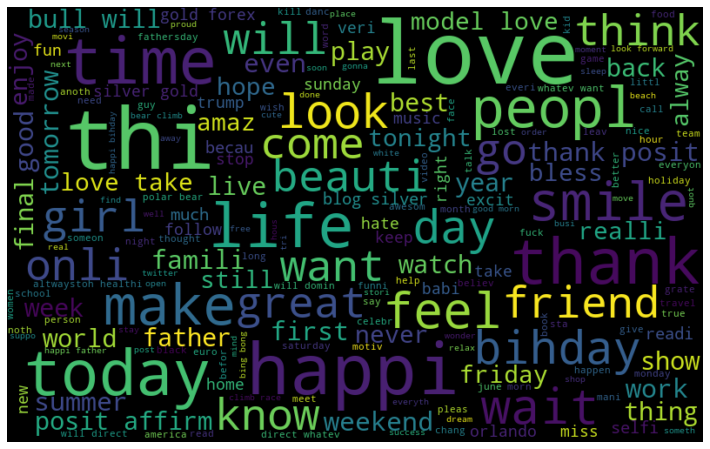

In [15]:
all_word = " ".join([sentences for sentences in df['clean_tweet']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800,height = 500,random_state =42,max_font_size = 100).generate(all_word)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [16]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags


In [17]:
hashtags = hashtag_extract(df['clean_tweet'])
hashtags = sum(hashtags,[])
print(hashtags[:10])

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate']


In [18]:
freq = nltk.FreqDist(hashtags)
d = pd.DataFrame({'Hashtags':list(freq.keys()),'count':list(freq.values())})
d.head()

,Hashtags,count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,376


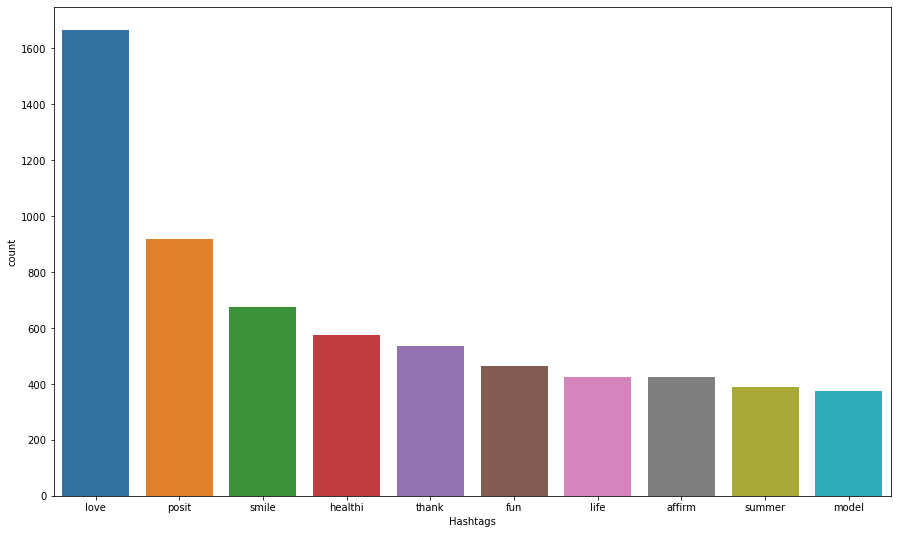

In [19]:
d = d.nlargest(columns = 'count',n=10)
plt.figure(figsize= (15,9))
sns.barplot(data = d,x = 'Hashtags',y='count')
plt.show()

# Input Split


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df =2,max_features = 1000,stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [21]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124819 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow,df['label'],random_state =42,test_size=0.25)

# Model Training


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [25]:
#training
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
#testing
predict = model.predict(x_test)
f1_score(y_test,predict)

0.49763033175355453

In [30]:
accuracy_score(y_test,predict)

0.9469403078463271